![alt-text](https://dimensionless.in/wp-content/uploads/2019/02/cover_tree.jpeg)

(Image Credit: Dimensionless Blog)

# Business Understanding

Custom Churn refers to the number of customers who are likely to cancel the subscription after a given interval of time. It has lot of business value, for an organization ranging from providing services such as SaaS, Entertainment Platform, or Telecom services. The various techniques through which the customers can be kept in check and ensure that they do not withdraw from the platform can possibly be as follows:
 
1. Fresh customer acquirement
2. Upsell the existing customer base
3. Customer Retention

These strategies play a key role in deciding the future customer base and profit of an organization, and also the special emphasis is on the Return of Investment (ROI) which is the ratio of the revenue generated from these activities to the cost of conducting them which should be substantial. Individual attention cannot be given to each customer, and even if provided the revenue generated would not exceed the cost and time given for retention. Thus, we are left with the option of identifying the set of customers which are likely to leave or cancel the subscription, and hence provide an optimal strategy to retain those in that particular set. This can be done by predicting the customer churn in advance before cancellation of the subscription by their respective users.

A simple concept adopted by the Telecom companies involved churn prediction as a binary classification task, where the the output or target variable is simply having two values 'Yes' or 'No' whether a customer is likely to be retained or not in the user subscription. It involves a simple three step approach:

1. Gathering the customer data, the factors which would affect their subscription in a .csv file
2. Designing a predictor or making use of third-party prediction service where the data has to be uploaded for modelling
3. Use the model on each current customer to predict whether they are at risk of leaving.

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/churn-modelling/Churn_Modelling.csv


In [3]:
df = pd.read_csv('/kaggle/input/churn-modelling/Churn_Modelling.csv')

In [6]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
df.info()
print("Shape of Data: ", df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
Shape of Data:  (10000, 14)


In [41]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


We will be following the **Crisp-DM** Approach in this project starting with the following.

# Data Understanding

There are 14 features in the given dataset:
1. RowNumber (Primary ID): Unique row figure assigned to each row of the data
2. CustomerId (Primary ID) and Surname: The unique identification number assigned to each customer, and 2932 different user surnames
3. CreditScore (numerical): The credit scores are assigned to customer based on their subscription and loyalty and are ranging from 350-850
4. Geography (categorical): The data is for only three countries: France, Spain and Germany
5. Gender (categorical): It is either 'Male' or 'Female'
6. Age (numerical): It is from 18 years old adults to 92 years old senior citizens
7. Tenure (numerical): The number of years the customer has been using the platform ranging from 0 to 10 years
8. Balance (numerical: float): The amount of money in the customer's account 
9. NumOfProducts (numerical): The number of product subscriptions active for a user (ranging from 1 to 4) 
10. HasCrCard (categorical): Whether the user has a credit card or not (1:'Yes' or 0:'No')
11. IsActiveMember(categorical): Whether the user is an active member or not (1:'Yes' or 0:'No')
12. EstimatedSalary (numerical): An estimate of the user salary in the future
13. Exited (categorical): Whether the customer will cancel or continue the subscription 

Clearly, our **target** variable is the Exited feature which is defining whether the user will continue the subscription or not

- Task: Identify the users that will be exiting the platform (Exited: 0)
- Input Features: RowNumber, CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary
- Target Variable: Exited

There is no missing values in the data, and all columns are filled, hence we do not have to handle missing values, and the features seem quite independent too.
The features RowNumber, CustomerID do not add much to the prediction and can be either dropped or simply filtered for processing purposes

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px

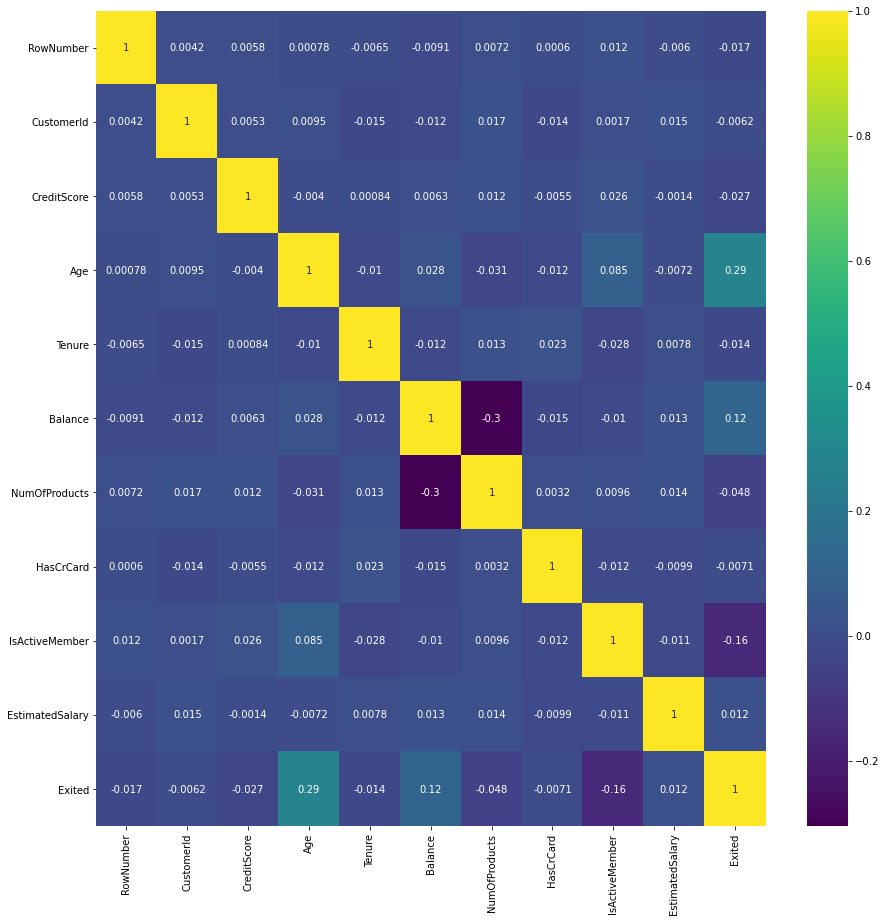

In [45]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True, cmap='viridis')

# Data Preparation

We can clearly see that there is no significant correlation between any of the features, and the highest correlation seems to between Age, and the target variable Exited which infers that there is a certain age group which is more likely to cancel the subscription than others, however this is also not highly correlated.

- There is a negative correlation between the CreditScore and Exited, which means that with increasing credit score, the chances of cancelling the subscription decreases and vice versa.
- Similarly, there is a negative correlation between the tenure and the cancellation meaning that larger tenures are less likely to cancel the subscription indicating loyalty to the services, and can be used effectively to identify a loyal customer base that can be upselled.
- The correlation between the Number of Products and the subscription cancellation is also negative, meaning with higher number of services, obviously the customer is less likely to unsubscribe and will be present on the platform.
- The negative correaltion between the Credit Card holders and cancellation is an unusual relationship to be studied.

In [130]:
# Create Input Features, and Output Feature

X = df.iloc[:, 3:-1].values
y = df.iloc[:, -1].values

print("Input Features: ", X)
print("Target Variable: ", y)

Input Features:  [[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]
Target Variable:  [1 0 1 ... 1 1 0]


In [63]:
# We can observe that the highest number of customers are from France, while Germany and Spain have almost equal number of customers, but France has almost double than them
country = df.groupby(['Geography']).count()
country.RowNumber

Geography
France     5014
Germany    2509
Spain      2477
Name: RowNumber, dtype: int64

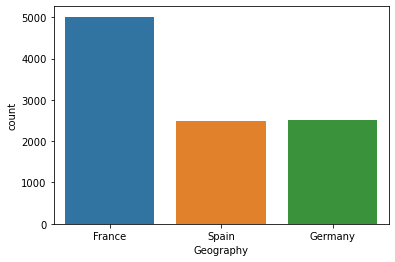

In [70]:
sns.countplot(data=df, x='Geography')

        RowNumber  CustomerId  Surname  CreditScore  Geography   Age  Tenure  \
Gender                                                                         
Female       4543        4543     4543         4543       4543  4543    4543   
Male         5457        5457     5457         5457       5457  5457    5457   

        Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
Gender                                                                       
Female     4543           4543       4543            4543             4543   
Male       5457           5457       5457            5457             5457   

        Exited  
Gender          
Female    4543  
Male      5457  


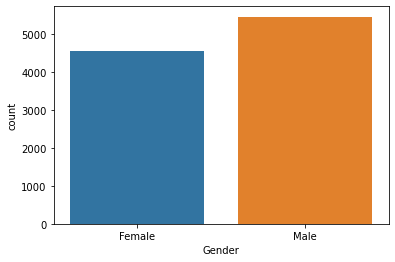

In [75]:
# The number of males is greater than the number of females
sns.countplot(data=df, x='Gender')

# Nearly 1000 more males are present in the subscription than females
genders = df.groupby(['Gender']).count()
print(genders)

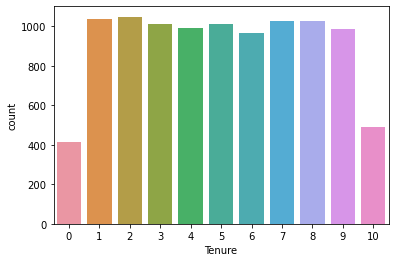

In [77]:
# So, we can say that the users are almost equitably distributed except for new users and very loyal users (10 years)
sns.countplot(data=df, x='Tenure')

In [79]:
# The median of the data is clearly 37 years of age and the upper-quartile limit is 62 years, rest are outliers
fig = px.box(df, y="Age")
fig.show()

In [84]:
# So, there are only 359 users greater than age of 62 using the platform
total_aged = (df["Age"]>62)
total_aged.value_counts()

False    9641
True      359
Name: Age, dtype: int64

In [85]:
# The user base below 32 years old is substantial
total_young = (df["Age"]<32)
total_young.value_counts()

False    7628
True     2372
Name: Age, dtype: int64

Text(34.834322916666665, 0.5, 'Estimated Salary')

<Figure size 1440x1440 with 0 Axes>

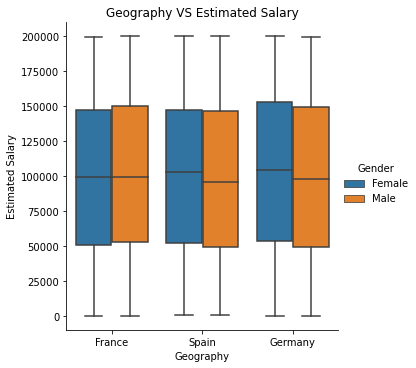

In [96]:
# The estimated salaries are within the range of nearly 1000000 for majority of cases
plt.figure(figsize=(20,20))
sns.catplot(x="Geography", y="EstimatedSalary", hue="Gender", kind="box", data=df)
plt.title("Geography VS Estimated Salary")
plt.xlabel("Geography")
plt.ylabel("Estimated Salary")

In [101]:
# Most users in all the countries are within the age of 65 at max
fig = px.box(df, x="Age", y="Geography", notched=True)
fig.show()

In [106]:
fig = px.parallel_categories(df, dimensions=['HasCrCard', 'IsActiveMember'],
                 color_continuous_scale=px.colors.sequential.Inferno,
                labels={'Gender':'Sex', 'HasCrCard':'Credit Card Holder', 'IsActiveMember':'Activity Status'})
fig.show()

In [108]:
fig = px.parallel_categories(df, dimensions=['HasCrCard', 'Gender','IsActiveMember'],
                 color_continuous_scale=px.colors.sequential.Inferno,
                labels={'Gender':'Sex', 'HasCrCard':'Credit Card Holder', 'IsActiveMember':'Activity Status'})
fig.show()

In [115]:
fig = px.scatter_matrix(df,
    dimensions=["Age"],
    color="Exited")
fig.show()

# A Few Insights and data preparation

- The maximum number of customers are from the country of France, almost double that of the user base present in Germany and Spain.
- Most of the users, are in age range of 31-65 with only 359 users above the age of 62 in all three countries.
- The estimated salaries of females is higher than males in Germany and Spain, while in France, that of males is higher than that of females.
- There are almost equal number of credit card holders who are active and inactive as well. Hence, we cannot say just by their credit card status whether they will remain active (also inferring the hypothesis that they may not have the capability to pay by credit card for subscription)
- Studying the gender with the credit card history, we can point out that males and females are in equal number almost contributing to being active and inactive users, and hence does not get affected much with their credit card status.
- There are no non-subscribers below the age of 36, and the maximum unsubscriptions take place in age-group of 51-55 and above 61.
- Most of the features are independent from each other and hence should not be combined to form newer features.

In [133]:
# Label Encoding the "Gender" column
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
X[:, 2] = label_encoder.fit_transform(X[:, 2])
print(X)
# One Hot Encoding the "Geography" column
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
coltrans = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(coltrans.fit_transform(X))
print(X.shape)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]
(10000, 12)


In [134]:
# Standardize all the values in order to make them comparable
from sklearn.preprocessing import StandardScaler
stand_sc = StandardScaler()
X = stand_sc.fit_transform(X)
print(X)

[[ 0.99720391 -0.57873591 -0.57380915 ...  0.64609167  0.97024255
   0.02188649]
 [-1.00280393 -0.57873591  1.74273971 ... -1.54776799  0.97024255
   0.21653375]
 [ 0.99720391 -0.57873591 -0.57380915 ...  0.64609167 -1.03067011
   0.2406869 ]
 ...
 [ 0.99720391 -0.57873591 -0.57380915 ... -1.54776799  0.97024255
  -1.00864308]
 [-1.00280393  1.72790383 -0.57380915 ...  0.64609167 -1.03067011
  -0.12523071]
 [ 0.99720391 -0.57873591 -0.57380915 ...  0.64609167 -1.03067011
  -1.07636976]]


In [135]:
# To balance the number of males, and females in the data along with countries to prevent overfitting
from imblearn.over_sampling import SMOTE
k = 1
seed=100
sm = SMOTE(sampling_strategy='auto', k_neighbors=k, random_state=seed)
X_res, y_res = sm.fit_resample(X, y)

In [142]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.3, random_state = 0)

# Modelling and Evaluation

In [153]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, roc_curve

def evaluation(y_test, clf, X_test):
    """
        Method to compute the following:
            1. Classification Report
            2. F1-score
            3. AUC-ROC score
            4. Accuracy
        Parameters:
            y_test: The target variable test set
            grid_clf: Grid classifier selected
            X_test: Input Feature Test Set
    """
    y_pred = clf.predict(X_test)
    print('CLASSIFICATION REPORT')
    print(classification_report(y_test, y_pred))
    
    print('AUC-ROC')
    print(roc_auc_score(y_test, y_pred))
      
    print('F1-Score')
    print(f1_score(y_test, y_pred))
    
    print('Accuracy')
    print(accuracy_score(y_test, y_pred))
# looking at the importance of each feature
def feature_importance(model):
    importances=model.feature_importances_

    # visualize to see the feature importance
    indices=np.argsort(importances)[::-1]
    plt.figure(figsize=(20,10))
    plt.bar(range(X.shape[1]), importances[indices])
    plt.show()
    
def plot_loss(model):
    prob=model.predict_proba(X_test)[:,1]

    fpr, tpr, thresholds=roc_curve(y_test, prob)
    plt.plot(fpr, tpr)

    auc=roc_auc_score(y_test, prob)
    print(auc)

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.85      0.82      0.83      2384
           1       0.83      0.86      0.84      2394

    accuracy                           0.84      4778
   macro avg       0.84      0.84      0.84      4778
weighted avg       0.84      0.84      0.84      4778

AUC-ROC
0.8379700299406234
F1-Score
0.8411330049261083
Accuracy
0.8380075345332775


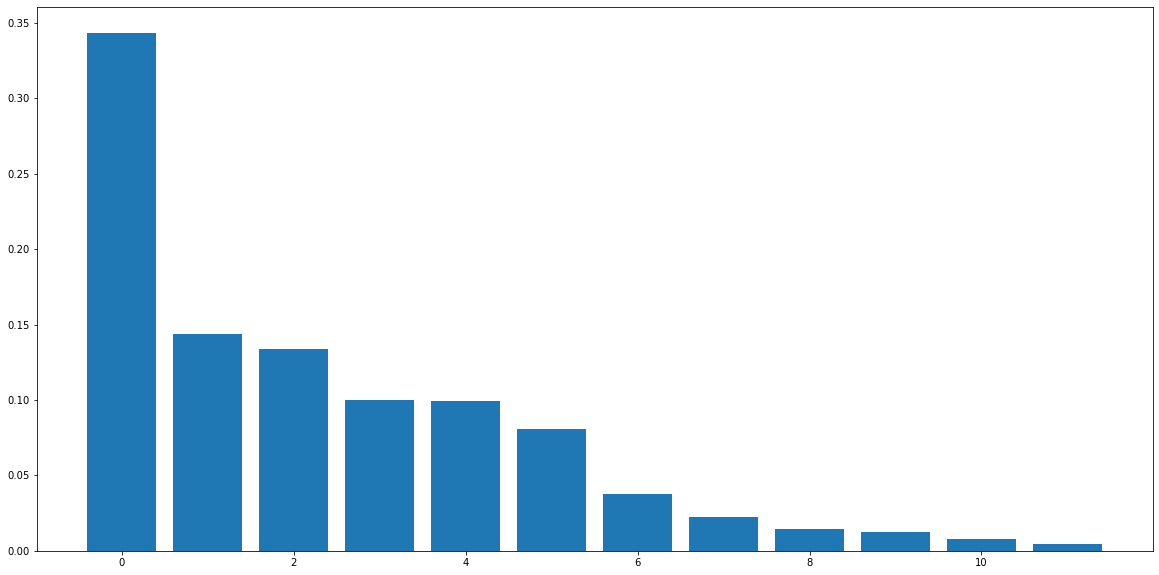

0.8379700299406234


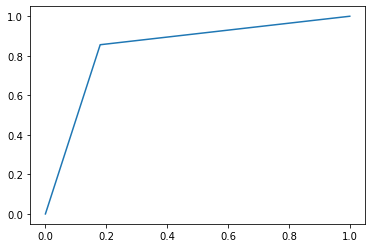

In [166]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
evaluation(y_test, dt_model, X_test)
feature_importance(dt_model)
plot_loss(dt_model)

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.91      0.90      0.91      2384
           1       0.90      0.92      0.91      2394

    accuracy                           0.91      4778
   macro avg       0.91      0.91      0.91      4778
weighted avg       0.91      0.91      0.91      4778

AUC-ROC
0.9062181109933671
F1-Score
0.9072463768115943
Accuracy
0.9062369192130598


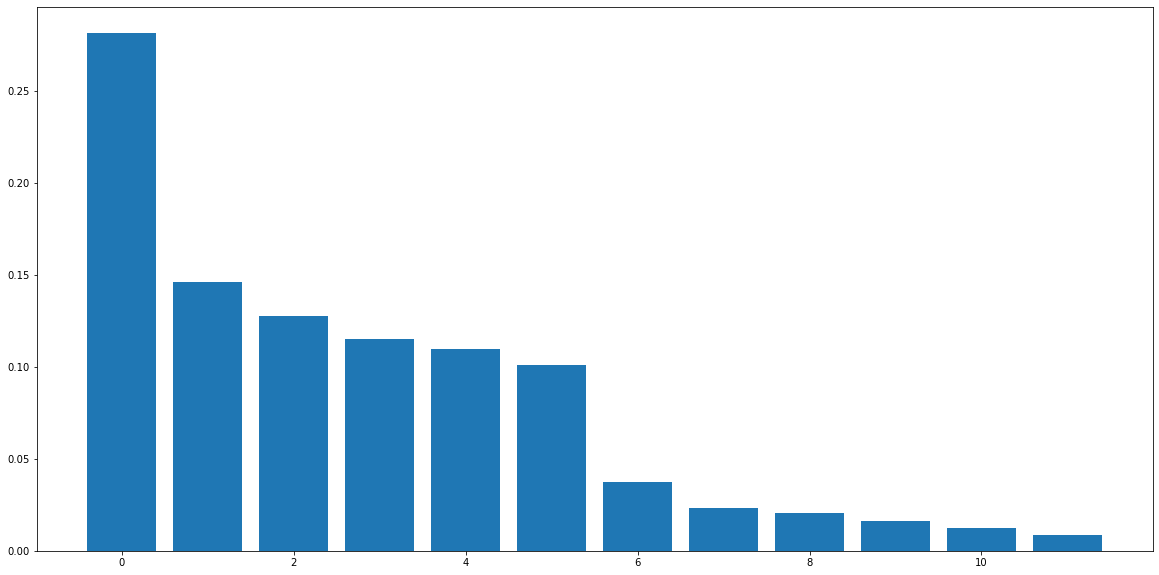

0.9661139881302809


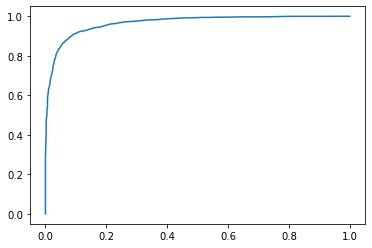

In [167]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)
evaluation(y_test, rf_model, X_test)
feature_importance(rf_model)
plot_loss(rf_model)

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.81      0.80      0.80      2384
           1       0.80      0.81      0.81      2394

    accuracy                           0.80      4778
   macro avg       0.80      0.80      0.80      4778
weighted avg       0.80      0.80      0.80      4778

AUC-ROC
0.8047155780951258
F1-Score
0.8063913675036314
Accuracy
0.8047300125575555
0.8820919749037022


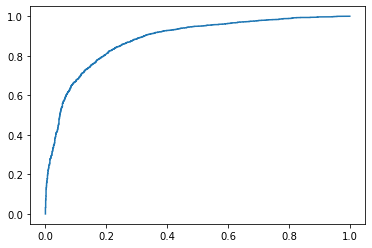

In [169]:
from sklearn.svm import SVC
svc_model=SVC(probability=True)
svc_model.fit(X_train, y_train)
evaluation(y_test, svc_model, X_test)
plot_loss(svc_model)

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.71      0.72      0.71      2384
           1       0.72      0.70      0.71      2394

    accuracy                           0.71      4778
   macro avg       0.71      0.71      0.71      4778
weighted avg       0.71      0.71      0.71      4778

AUC-ROC
0.7111951088571541
F1-Score
0.7089835512442006
Accuracy
0.7111762243616576
0.7745180905283342


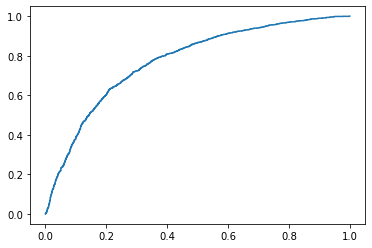

In [171]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
evaluation(y_test, lr_model, X_test)
plot_loss(lr_model)

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      2384
           1       0.91      0.89      0.90      2394

    accuracy                           0.90      4778
   macro avg       0.90      0.90      0.90      4778
weighted avg       0.90      0.90      0.90      4778

AUC-ROC
0.9018654368022966
F1-Score
0.9009085146841327
Accuracy
0.901841774801172


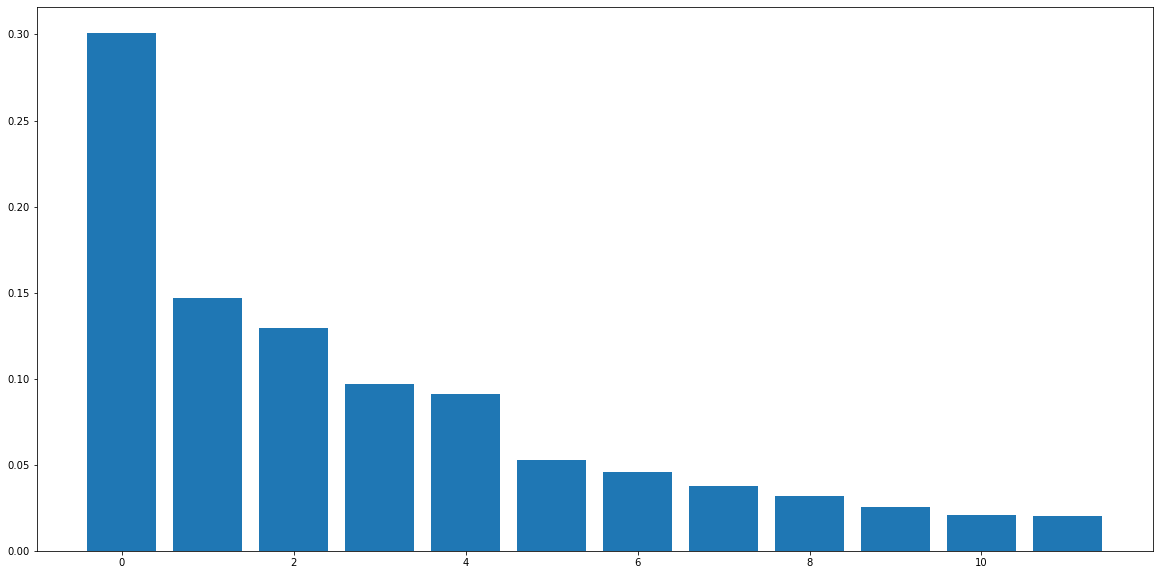

0.9626162722241844


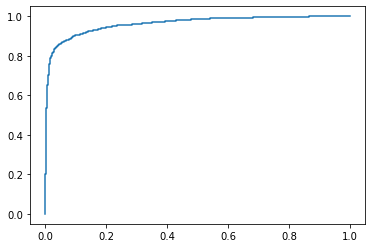

In [173]:
from xgboost import XGBClassifier
xg_model = XGBClassifier()
xg_model.fit(X_train, y_train)
evaluation(y_test, xg_model, X_test)
feature_importance(xg_model)
plot_loss(xg_model)

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      2384
           1       0.86      0.84      0.85      2394

    accuracy                           0.85      4778
   macro avg       0.85      0.85      0.85      4778
weighted avg       0.85      0.85      0.85      4778

AUC-ROC
0.8531013635879408
F1-Score
0.851585623678647
Accuracy
0.8530766010883215


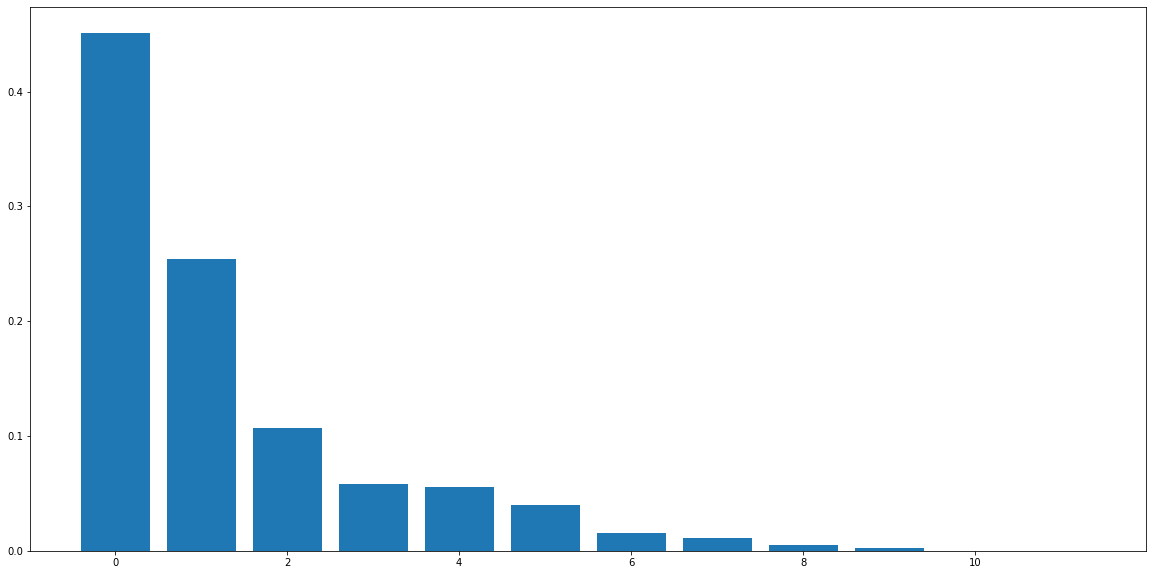

0.9295357205934298


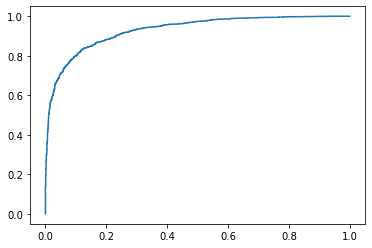

In [175]:
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
evaluation(y_test, gb_model, X_test)
feature_importance(gb_model)
plot_loss(gb_model)

In [184]:
# Let us try a small neural network to perform the required classification
import tensorflow as tf
# Initializing the ANN
nn = tf.keras.models.Sequential()

# Adding the input layer and the first hidden layer
nn.add(tf.keras.layers.Dense(units=10, activation='relu'))

# Adding the second hidden layer
nn.add(tf.keras.layers.Dense(units=6, activation='relu'))

# Adding the output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Part 3 - Training the ANN
# Compiling the ANN
nn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [187]:
nn.fit(X_train, y_train, batch_size = 128, steps_per_epoch = 64,  epochs = 50)

Epoch 1/50
64/64 [==============================] - 0s 1ms/step - loss: 0.4155 - accuracy: 0.8059
Epoch 2/50
64/64 [==============================] - 0s 1ms/step - loss: 0.4117 - accuracy: 0.8062
Epoch 3/50
64/64 [==============================] - 0s 1ms/step - loss: 0.4076 - accuracy: 0.8091
Epoch 4/50
64/64 [==============================] - 0s 1ms/step - loss: 0.4178 - accuracy: 0.8010
Epoch 5/50
64/64 [==============================] - 0s 1ms/step - loss: 0.4160 - accuracy: 0.8021
Epoch 6/50
64/64 [==============================] - 0s 1ms/step - loss: 0.4091 - accuracy: 0.8122
Epoch 7/50
64/64 [==============================] - 0s 1ms/step - loss: 0.4172 - accuracy: 0.7988
Epoch 8/50
64/64 [==============================] - 0s 1ms/step - loss: 0.4135 - accuracy: 0.8057
Epoch 9/50
64/64 [==============================] - 0s 1ms/step - loss: 0.4153 - accuracy: 0.8027
Epoch 10/50
64/64 [==============================] - 0s 1ms/step - loss: 0.4075 - accuracy: 0.8097
Epoch 11/50
64/64 [

In [192]:
y_pred = nn.predict(X_test)
for i in range(0, y_pred.size):
    if y_pred[i] > 0.5:
        y_pred[i] = 1
    else:
        y_pred[i] = 0
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
print(accuracy)

[[1913  471]
 [ 522 1872]]
79.22


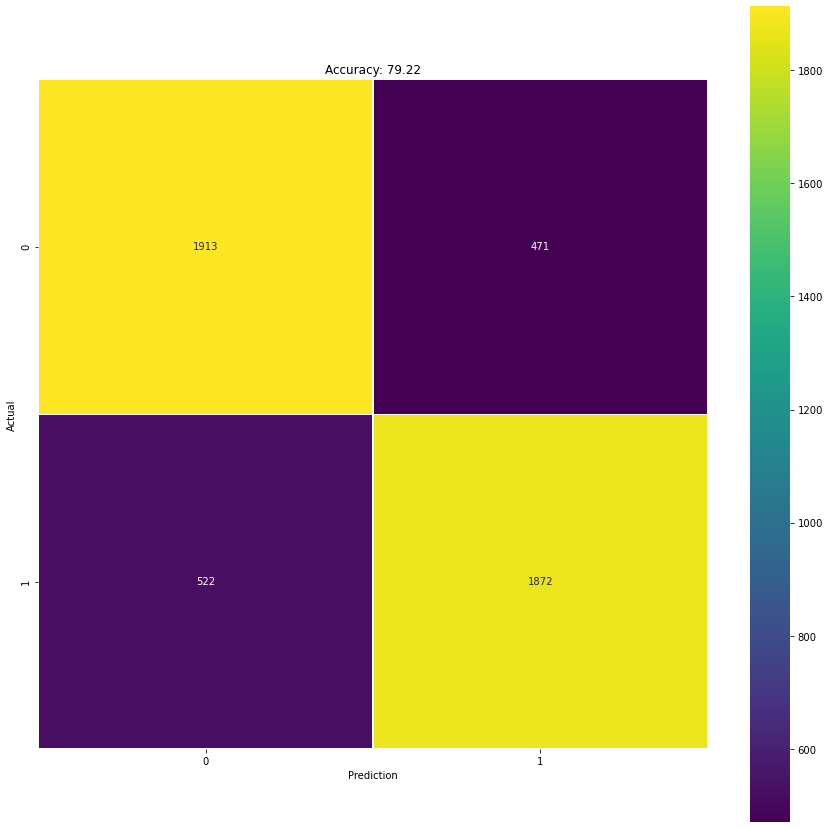

In [193]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (15, 15))
sns.heatmap(cm, annot = True, fmt = '.0f', linewidths = .1, square = True, cmap='viridis')
plt.xlabel('Prediction')
plt.title('Accuracy: {0}'.format(round(accuracy, 2)))
plt.ylabel('Actual')
plt.show()

# Summary

- Dataset has no missing values and has mostly independent features
- The imbalance present in the data in form of majority males and lesser females, and France dominating over Spain and Germany was solved using Synthetic Minority Oversampling
- Age is the best feature used for predicting the customer churn closely followed by other indpendent features in the data
- The credit card status does not seem to be much of a contributing feature and hence, credit card offers may not be a relevant business strategy to reduce customer churn.
- The majority of subscribers were in age bracket of [32, 65].
- There were very few subscribers above the age of 65 combined in all three countries.
- The estimated salary of females was higher than that of males in Spain and Germany, but did not showed a direct contribution to active subscriptions. 
- The performance of XG-Boost Classifier was best among its counterparts with F1-Score of 90.09